# GATE output formats and Python

## GATE can output information in different formats:
* ASCII output
* ROOT tree output
* NumPy tree output (new!)
* Images (mhd, hdr) output

In [ ]:
# Module with scientific computing functions (matrix/vector)
import numpy as np                
# Module to read root files
import uproot


# GATE ASCII output


# Plot dose depth dose and uncertainty

In [1]:
# Tell Jupyter to plot figure right in the page
%matplotlib inline

# Module with plot capabilities
import matplotlib.pyplot as plt

# Module with scientific computing functions (matrix/vector)
import numpy as np                

In [2]:
# Load data from txt files
d_edep = np.loadtxt('../output/gamma-depth-Edep.txt')
d_uncert = np.loadtxt('../output/gamma-depth-Edep-Uncertainty.txt')
p_edep = np.loadtxt('../output/gamma-profile-Edep.txt')
p_uncert = np.loadtxt('../output/gamma-profile-Edep-Uncertainty.txt')

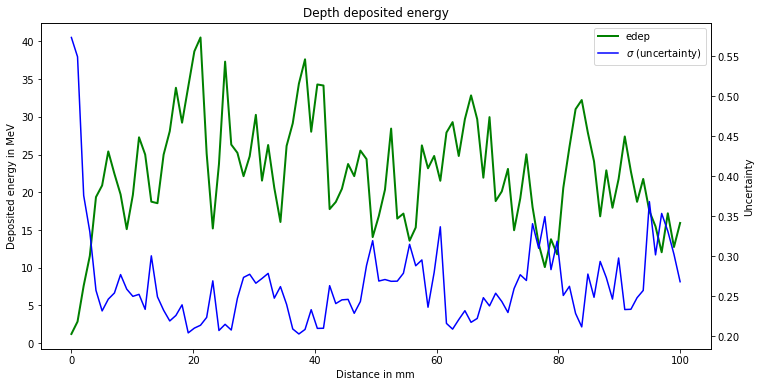

In [3]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6), facecolor='w')

# X values from 0 to n
# n is the length of d_edep
n = len(d_edep)
x = np.linspace(0, n, n)

# First curve, gamma depth in green
y = d_edep
c1 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a
# different y axis
y = d_uncert
ax2 = ax.twinx()
c2 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c1+c2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Depth deposited energy')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

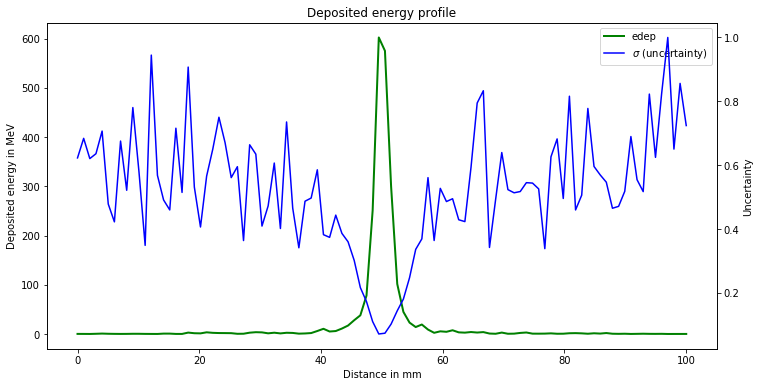

In [4]:
# Declare a figure 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6), facecolor='w')

# Third curve, gamma profile in green
n = len(p_edep)
x = np.linspace(0, n, n)
y = p_edep
c3 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Last curve, gamma uncertainty profile
y = p_uncert
ax2 = ax.twinx()
c4 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c3+c4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Deposited energy profile')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

## GATE ROOT tree output